In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S02W4953_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])


In [3]:
df.head()

datetime       eMeter  eMeterReturn    eMeterLow  \
0 2017-07-05 11:00:00  1470.556030   1389.960327  1475.128052   
1 2017-07-05 12:00:00  1470.556152   1391.007935  1475.128052   
2 2017-07-05 13:00:00  1470.579590   1391.560547  1475.128052   
3 2017-07-05 14:00:00  1470.579956   1392.567749  1475.128052   
4 2017-07-05 15:00:00  1470.581055   1393.423828  1475.128052   

   eMeterLowReturn     ePower  ePowerReturn     gasMeter  gasPower  \
0       599.853027   0.000000   1604.250000  1238.140991  0.060059   
1       599.853027  14.714286    596.379700  1238.201050  0.060059   
2       599.853027  11.562675    801.231201  1238.204956  0.003906   
3       599.853027   0.089636    960.882324  1238.204956  0.000000   
4       599.853027   0.000000    837.653625  1238.208984  0.004028   

           DD    ...               P           Q   RG        SQ          T  \
0  294.700002    ...     1018.250000  516.166667  0.0  6.037200  22.816667   
1  300.549998    ...     1018.233337  662.666667  0.0  6.960717  23.466667   
2  285.750000    ...     1018.216675  694.500000  0.0  5.372850  23.983333   
3  294.550003    ...     1018.250000  812.666667  0.0  9.047567  24.233333   
4  311.250000    ...     1018.366669  811.000000  0.0  9.430167  23.950000   

         T10         TD          U            VV        WW  
0  24.983333  15.716667  63.833333  34483.333333  2.833333  
1  25.400000  15.633334  61.166667  33350.000000  2.000000  
2  26.283333  15.466667  58.500000  36666.666667  1.666667  
3  27.116667  15.483333  57.833333  35400.000000  1.666667  
4  26.583334  14.983333  56.833333  35000.000000  1.500000  

[5 rows x 24 columns]

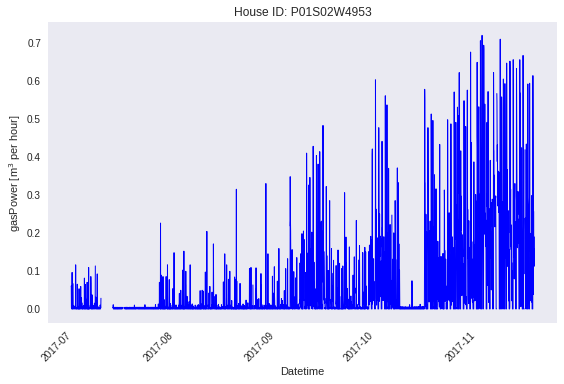

In [4]:
plt.title('House ID: P01S02W4953')

plt.plot(df['datetime'][:], df['gasPower'][:], '-', color='b', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('sample1.png', dpi=500)

plt.show()

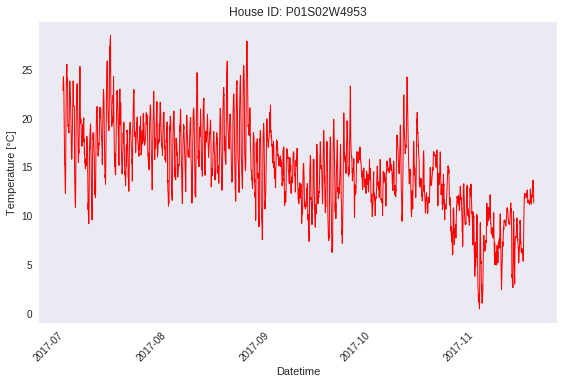

In [5]:
plt.title('House ID: P01S02W4953')

plt.plot(df['datetime'][:], df['T'][:], '-', color='r', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('Temperature [°C]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('sample2.png', dpi=1000)

plt.show()

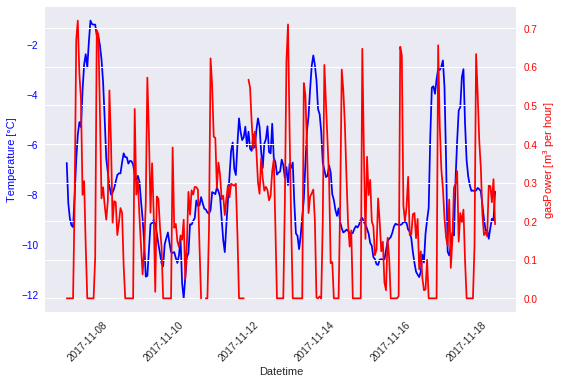

In [24]:
fig, ax1 = plt.subplots()
t = df['datetime'][3000:3272]
ax1.plot(t, df['T'][3000:3272]*-1, 'b-')
ax1.set_xlabel('Datetime')
plt.xticks(rotation=45)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temperature [°C]', color='b')
ax1.tick_params('y', colors='b')
plt.grid()

ax2 = ax1.twinx()
ax2.plot(t, df['gasPower'][3000:3272], 'r-')
ax2.set_ylabel('gasPower [m$^3$ per hour]', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.savefig('sample3.png', dpi=1000)
plt.show()

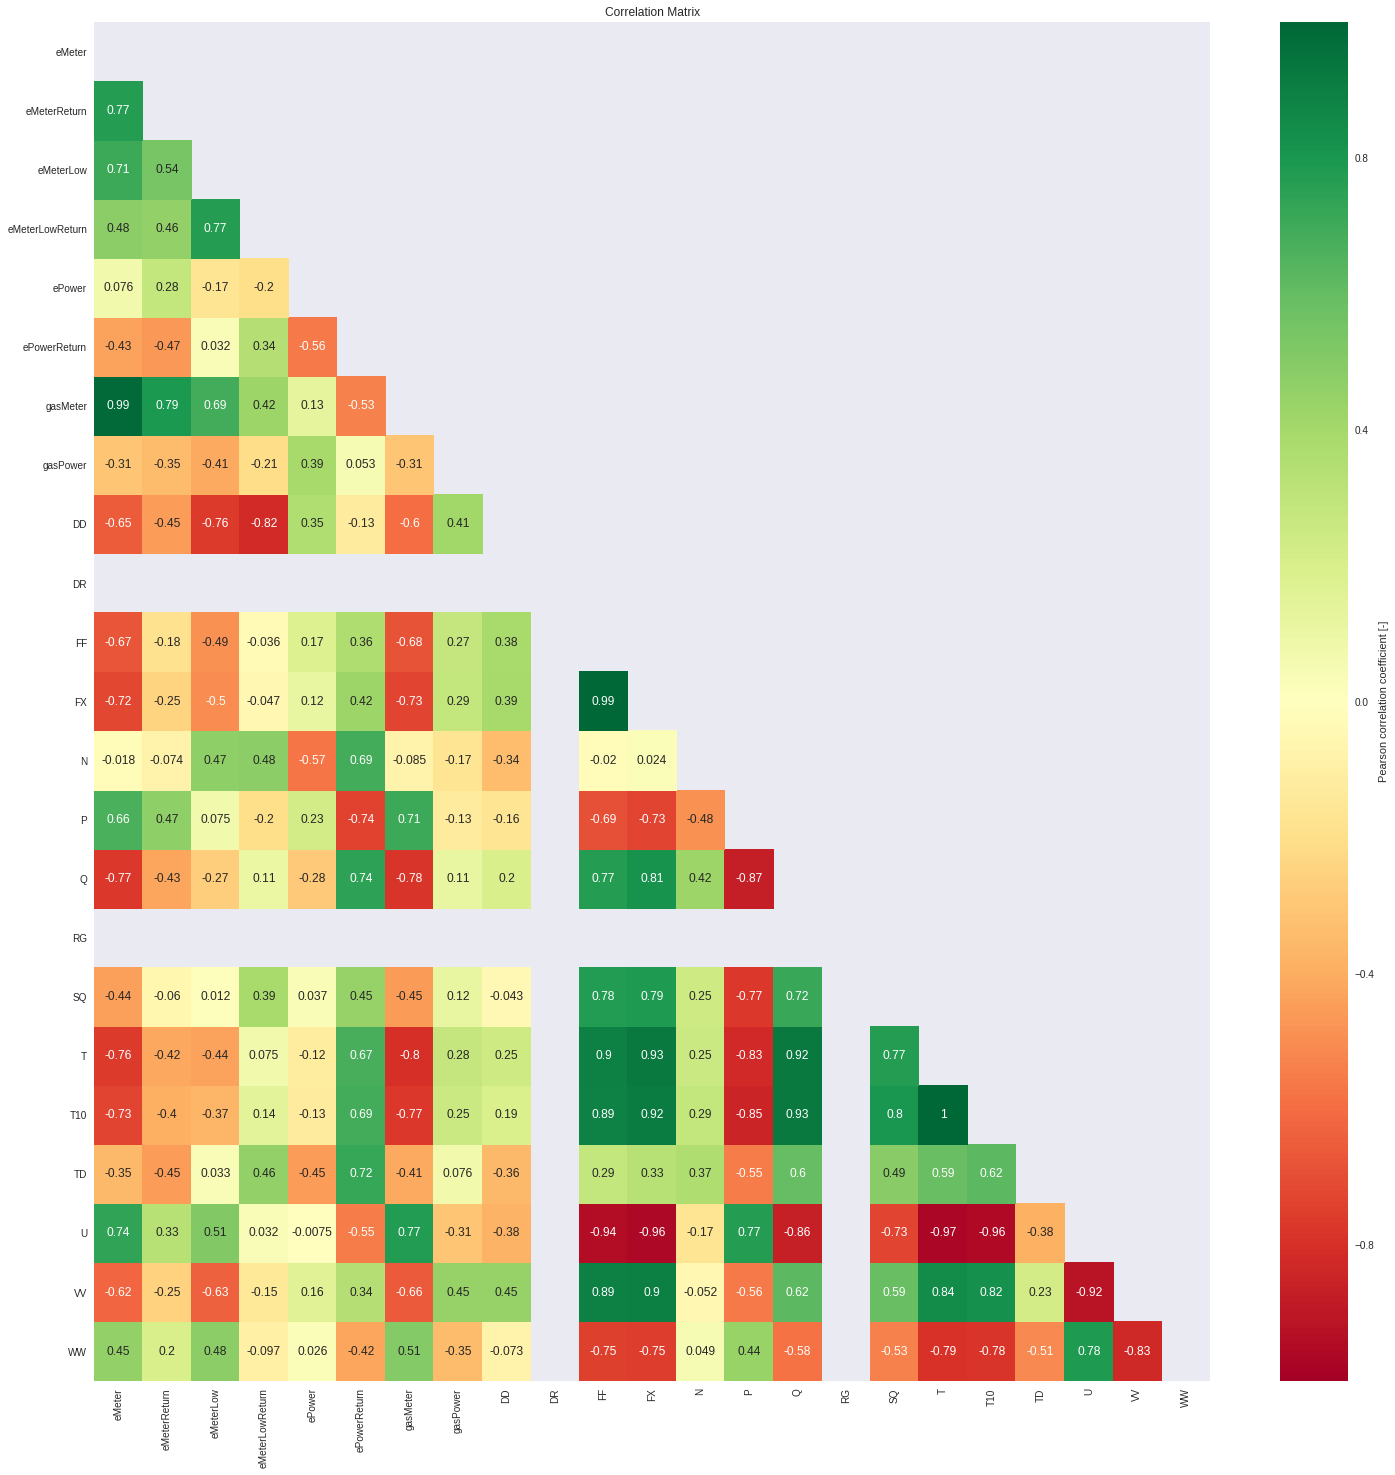

In [126]:
corr = df[0:24].corr()
mask = np.zeros_like(df[24:48].corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
            cbar_kws={'label':'Pearson correlation coefficient [-]'})

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('sample.png', dpi=500)
plt.show()


In [128]:
corr = df[24:48].corr()
print(corr['gasPower'][:])

eMeter            -0.049809
eMeterReturn       0.129135
eMeterLow         -0.012108
eMeterLowReturn    0.182382
ePower            -0.156167
ePowerReturn      -0.069735
gasMeter           0.212213
gasPower           1.000000
DD                 0.075256
DR                -0.143747
FF                 0.284191
FX                 0.219182
N                  0.100528
P                 -0.178465
Q                 -0.079291
RG                -0.130121
SQ                 0.050193
T                  0.113778
T10                0.056649
TD                 0.091337
U                 -0.062377
VV                 0.103601
WW                -0.125657
Name: gasPower, dtype: float64


In [193]:
result = []
for i in range(len(df/24)):
    corr = df[(i*24+0):(i*24+24)].corr()
    result.append(corr[['gasPower']])

In [199]:
for d in range(len(result)):
    result[d] = result[d].T

In [207]:
frames = (result[:])
resultaat = pd.concat(frames)

In [213]:
resultaat.head()

eMeter  eMeterReturn  eMeterLow  eMeterLowReturn    ePower  \
gasPower -0.306800     -0.349668  -0.412250        -0.208293  0.393369   
gasPower -0.049809      0.129135  -0.012108         0.182382 -0.156167   
gasPower  0.073041      0.136661   0.192916         0.093958  0.114568   
gasPower       NaN           NaN  -0.382443        -0.101853 -0.036380   
gasPower  0.252081      0.131197  -0.034810        -0.223487 -0.257283   

          ePowerReturn  gasMeter  gasPower        DD        DR    ...     \
gasPower      0.053156 -0.307187       1.0  0.407587       NaN    ...      
gasPower     -0.069735  0.212213       1.0  0.075256 -0.143747    ...      
gasPower     -0.104912  0.375490       1.0  0.028295       NaN    ...      
gasPower      0.076727 -0.179911       1.0  0.250194       NaN    ...      
gasPower      0.219787  0.168485       1.0  0.138788  0.137026    ...      

                 P         Q        RG        SQ         T       T10  \
gasPower -0.131848  0.109664       NaN  0.115827  0.276690  0.253327   
gasPower -0.178465 -0.079291 -0.130121  0.050193  0.113778  0.056649   
gasPower  0.053802 -0.031720       NaN  0.114606  0.116671  0.091542   
gasPower  0.183879  0.380320       NaN  0.234174  0.364326  0.380062   
gasPower  0.007989  0.124638       NaN  0.188950  0.143456  0.167743   

                TD         U        VV        WW  
gasPower  0.075566 -0.308321  0.445800 -0.348117  
gasPower  0.091337 -0.062377  0.103601 -0.125657  
gasPower -0.330578 -0.353849  0.422164 -0.204192  
gasPower  0.399967 -0.294246  0.381720 -0.258601  
gasPower -0.114424 -0.166135  0.001319  0.307933  

[5 rows x 23 columns]